In [22]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.cluster import KMeans


In [ ]:
data=open("/content/drive/MyDrive/Data Mining/HW3-1_iris_new_data.txt","r")
data=data.readlines()
print(data)

In [ ]:
d = []
for l in data:
    s=str(l[0:len(l)-1])
    d.append(s)
print(d)

In [ ]:
test = []

k = 0
for i in d:
  y = i.split()
  test.append(y)
print(test)

#print(test[0][1])

In [ ]:
newList = []
listSize = len(test)
for i in range(0, listSize):
    newList.append([])
    for j in range(0, 4):
        newList[i].append(float(test[i][j]))
print(newList)

In [ ]:
col = ['a','b','c','d']
data = pd.DataFrame(newList)
data.columns = col
print(data)

In [ ]:
plt.scatter(data['a'],data['b'])
plt.show()

In [ ]:
kmeans = KMeans(3)
kmeans.fit(data)

In [ ]:
identified_clusters = kmeans.fit_predict(data)
identified_clusters

In [ ]:
data_with_clusters = data.copy()
data_with_clusters['Clusters'] = identified_clusters 
plt.scatter(data_with_clusters['a'],data_with_clusters['b'],c=data_with_clusters['Clusters'],cmap='rainbow')

In [ ]:
print(identified_clusters)

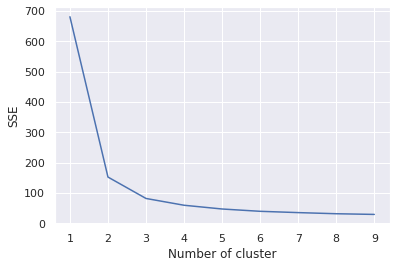

In [30]:
sse = {}
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, max_iter=1000).fit(data)
    data["clusters"] = kmeans.labels_
    #print(data["clusters"])
    sse[k] = kmeans.inertia_ # Inertia: Sum of distances of samples to their closest cluster center
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
plt.show()

In [29]:
f = open("result_cluster.txt", "w")
for i in list(identified_clusters):
    if i==0:
        f.write("1\n")
    if i==1:
        f.write("2\n")
    if i==2:
        f.write("3\n")
f.close()